# N-Queens Optimization Solution using Variable Neighborhood Search (VNS)

    Author: Eduardo Augusto Pereira Gomes
    University: Universidade de São Paulo, Escola de Engenharia de São Carlos
    Course: Methaeurísticas Aplicadas à problemas de Engenharia Elétrica
    Date: April 11, 2023

The 8-Queens placement problem involves placing eight queens on an 8x8 chessboard so that no two queens threaten each other. This classic problem in computer science has been extensively studied in optimization.

In this Jupyter Notebook, we present a solution to the 8-Queens problem using the VNS algorithm. The chessboard and figures are modeled using the chess package, and the VNS algorithm is implemented using built-in functions from Python’s Numpy and Random packages.

One notable feature of this notebook is the ability to visualize the iterative process of the VNS algorithm by displaying the chessboard at each step. This feature provides insight into the algorithm’s behavior and can help understand how it works.

By demonstrating the VNS algorithm’s behavior and performance, this notebook offers a comprehensive solution to the 8-Queens problem using a widely studied optimization technique. In addition, we provide an analysis of the VNS algorithm’s performance on the 8-Queens problem. This analysis provides further insight into the algorithm’s behavior and ability to find a solution efficiently.

Our solution is organized into the following sections, implemented in the following order: This analysis provides further insight into the algorithm's behavior and its ability to find a solution efficiently. By demonstrating the VNS algorithm's behavior and performance, this notebook offers a comprehensive solution to the 8-Queens problem using a widely studied optimization technique.

Our solution is organized into the following sections, implemented in the following order:

2. Python Packages
3. N-Queens Chess Board Modeling
4. Variable Neighborhood Search Optimization Modeling
5. Optimization Algorithm
6. Data Management
7. Optimization Results and Analysis

# Python Packages Used in the Jupyter Notebook

## Numeric and Data Management Packages

In [1]:
import numpy as np
import random
import pandas as pd

## Graphical Visualization Packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Packages for Chess Game Modeling

In [ ]:
!pip install chess

In [3]:
import chess
import chess.svg

## Visual Interaction Packages

In [4]:
from IPython.display import SVG, display, HTML
import ipywidgets as widgets
from ipywidgets import interact

# N-Queens Chess Board Modeling

This section contains functions interacting with a chess board, explicitly addressing the N-Queen placement problem.

Functions included:

- **set_queens_on_board(queens_positions)**: returns a chess board with queens placed in the specified positions.   
- **is_queen**(pos, board): checks whether the position on the board contains a queen.
- **number_of_queens_on_board**(board): counts the number of queens currently on the board.
- **number_of_positions_under_attack**(board): counts the number of board positions currently under attack by one or more queens.
- **number_of_queens_under_attack**(board): counts the number of queens currently under attack by one or more other queens.
- **number_of_queens_per_row**(board): counts the number of queens in each row.
- **number_of_queens_per_col**(board):counts the number of queens in each column.

Input Description:

- **queens_positions**: A list of integers within the range [1, 64] to place the queen in an 8x8 chess board.
- **board**: A chess board generated by the chess package. You can use the **set_queens_on_board()** function to generate N-Queen chess optimization placement. 
- **pos**: An integer that represents the row and column given an 8x8 chess board.

In [5]:
def set_queens_on_board(queens_positions):
    #Cria um tabuleiro de xadrez padrão
    board = chess.Board()
    board.clear() # remove todas as peças do tabuleiro
    for square in queens_positions:
        board.set_piece_at(square, chess.Piece(chess.QUEEN, True))
    return board

In [6]:
def is_queen(pos, board):
    if board.piece_at(pos) == None:
        return False
    elif board.piece_at(pos).symbol() == "Q":        
        return True
    else:
        return False

In [7]:
def number_of_queens_on_board(board):
    queens = 0
    for k in range(8):
        for m in range(8):
            pos = chess.square(k, m)
            is_queen(pos, board)
            if is_queen(pos, board) == True:
                queens+=1
    return queens

In [8]:
def number_of_positions_under_atack(board):
    NumberOfAtackedPositions = 0
    for k in range(8):
        for m in range(8):
            pos = chess.square(k, m)
            if board.is_attacked_by(chess.WHITE,pos) == True:
                NumberOfAtackedPositions+=1
    return NumberOfAtackedPositions

In [9]:
def number_of_queens_under_atack(board):
    pieces_under_atack = 0
    for k in range(8):
        for m in range(8):
            pos = chess.square(k, m)
            if is_queen(pos, board) == True:
                if board.is_attacked_by(chess.WHITE,pos) == True:
                    pieces_under_atack += 1
    return pieces_under_atack

In [10]:
def number_of_queens_per_row(board):
    queens = 0
    N      = 0
    for k in range(8):
        queens = 0
        for m in range(8):
            pos = chess.square(m,k)
            is_queen(pos, board)
            if is_queen(pos, board) == True:
                queens+=1
        if queens>N:
            N = queens
    return N

In [11]:
def number_of_queens_per_col(board):
    queens = 0
    N      = 0
    for k in range(8):
        queens = 0
        for m in range(8):
            pos = chess.square(k, m)
            is_queen(pos, board)
            if is_queen(pos, board) == True:
                queens+=1
        if queens>N:
            N = queens
    return N

# VNS Optimization Modeling
The VNS algorithm requires a set of functionalities to develop an optimization algorithm, including Neighborhood Automation, Objective function Automation, and Neighborhood Update modules.

## Neighborhood Automation

The Neighborhood Automation module generates and modifies a set of binary vectors used as neighbors. It includes functions for generating random binary vectors with a specified number of ones and length, modifying neighbors by randomly changing the position of k 1’s in the vector and converting neighbors to binary.

   - `gen_neighborhood(NumberOfNeighbohrs,NuberofOnes,ProblemSize)`: Generates a set of *NumberOfNeighbohrs* random binary vectors of length *ProblemSize* with *NuberofOnes* ones randomly placed within each vector. These vectors are used as the initial set of neighbors in the optimization algorithm.
   - `gen_neighbor(NuberofOnes,ProblemSize)`: Generates a random binary vector of length *ProblemSize* with *NuberofOnes* ones randomly placed within the vector.

In [12]:
def gen_neighborhood(NumberOfNeighbohrs,NuberofOnes,ProblemSize):
    neighborhood = np.zeros([NumberOfNeighbohrs,ProblemSize])
    for k in range(NumberOfNeighbohrs):
        neighborhood[k] = gen_neighbor(NuberofOnes,ProblemSize)
    return neighborhood

In [13]:
def gen_neighbor(NuberofOnes,ProblemSize):
    neighbor = gen_neighbor_int(NuberofOnes,ProblemSize)
    neighbor = neighbor_to_binary(neighbor,ProblemSize)
    return neighbor

### Neighborhood modifier

   - `random_neighborhood(neighborhood,k)`: Apply the random_neighbor method in a loop for a set of neighbors. The number of bits to modify can be set with k.
   - `random_neighbor(bit,k)`: takes a binary vector (bit) as input and randomly changes the positions of `k` 1’s in the vector. For each of the k bits, it first selects a random index where a one currently exists in the vector, sets it to 0, and then selects another random index where a 0 currently exists and sets it to 1. The function preserves the total number of 1’s in the vector but changes the positions of `k` 1's.

In [14]:
def random_neighborhood(neighborhood,k):
    index=0;xl = neighborhood.copy()
    for bit in neighborhood:
        xl[index] = random_neighbor(bit,k)
        index+=1
    return xl

In [15]:
def random_neighbor(bit,k):
    iter=0;newbit =bit.copy()
    #while(iter<k):
    ones_positions  = np.where(newbit==1)[0]
    zeros_positions = np.where(newbit==0)[0]
    ones_selection = ones_positions[random.sample(range(len(ones_positions)), k)]
    zeros_selection = zeros_positions[random.sample(range(len(zeros_positions)), k)]
    newbit[ones_selection]=0
    newbit[zeros_selection]=1
    iter+=1
    return newbit

### Complementary Functions

- `gen_neighbor_int(NuberofOnes,ProblemSize)`: define a random neighbor considering a list of integers defining binary 1.
- `neighbor_to_binary(neighbor,ProblemSize)`: converts the integer solution to binary.

In [16]:
def gen_neighbor_int(NuberofOnes,ProblemSize):
    return random.sample(range(ProblemSize), NuberofOnes)

In [17]:
def neighbor_to_binary(neighbor,ProblemSize):
    binary_neighbor = np.zeros([1,ProblemSize])
    for k in neighbor:
        binary_neighbor[0,k] = 1
    return binary_neighbor

## Objective Function Automation
The Objective function Automation module provides functions for computing the objective value for an optimization problem. It includes functions for computing the objective value for a given objective function, checking if new neighbors minimize the objective function globally or locally, and checking if the solution has been found.
   - `objective_function(bit)`: Compute the objective value for a given objective function to optimize the placement of N-Queens on a Chessboard.
   - `neighborhood_objective_function(neighborhood)`: Compute the objective value for a VNS using a given objective function.
   - `is_objective_minimizing(new_objective,objective)`: Check if new neighbors minimize the objective function globally.
   - `is_any_local_objective_minimizing(new_objective,objective)`: Check if any neighbor minimizes the objective function locally.
   - `is_stop_criteria(objective)`: Check if the solution was found.

In [18]:
def objective_function(bit):
    board = set_queens_on_board(np.where(bit==1)[0])
    Nq = number_of_queens_on_board(board)
    Nr = (number_of_queens_per_row(board)-1)/(Nq)
    Nc = (number_of_queens_per_col(board)-1)/(Nq)    
    Nrc =(Nr+Nc)/2    
    Naq = number_of_queens_under_atack(board)/Nq    
    #objective = Naq**2 + Nrc**2
    objective = Naq
    return objective

In [19]:
def neighborhood_objective_function(neighborhood):
    index=0;objective = np.zeros([np.shape(neighborhood)[0],1])
    for x in neighborhood:
        objective[index]=objective_function(x)
        index+=1;
    return objective

In [20]:
def is_objective_minimizing(new_objective,objective):
    if np.min(new_objective) < np.min(objective):
        return True
    else:
        return False

In [21]:
def is_any_local_objective_minimizing(new_objective,objective):
    is_minimizing = False
    for k in range(len(objective)):
        if new_objective[k] < objective[k]:
            is_minimizing = True
            break
    return is_minimizing

In [22]:
def is_stop_criteria(objective):
    if objective<=0:
        return True
    else:
        return False

## Neighborhood Update

The Neighborhood Update module provides a function for deciding on updating the neighborhood by comparing the objective function from the neighborhood with the new neighborhood. This function is used in the VNS algorithm to determine whether to accept the new neighborhood or keep the current one.

- `local_neighborhood_update(new_neighborhood,new_objective,neighborhood,objective)`: This function decides on the updating of a neighborhood by comparing the objective function from the neighborhood with the new neighborhood.

In [23]:
def local_neighborhood_update(new_neighborhood,new_objective,neighborhood,objective):
    for k in range(np.shape(neighborhood)[0]):
        if new_objective[k] < objective[k]:
            objective[k]   = new_objective[k]
            neighborhood[k]= new_neighborhood[k] 
    return neighborhood, objective 

# Optimization Algorithm
The VNS is an optimization algorithm that can solve the N-Queens placement problem. The algorithm works by iteratively searching for a better solution by exploring different neighborhoods of the current solution. The algorithm consists of the following steps:

1. **Start**: The algorithm starts by generating an initial solution to the problem. The 8-Queens placement problem involves placing eight queens on the chessboard so that no two queens threaten each other. Additionally, the algorithm initiates optimization parameters, such as the maximum number of iterations, the number of neighbors, and the diversification parameter, $k_{máx}$.
2. **Shaking**:  In this step, the algorithm generates a new solution by modifying the current solution. Specifically, each queen is moved to a new randomly chosen position within its column. The number of queens that are moved is controlled by the diversification parameter, $k$. The shaking step is essential because it allows the algorithm to escape local optima and explore different regions of the solution space.
3. **Change Neighborhood Strategy**: The number of queens allowed to move is controlled by the diversification parameter, k. If the optimization criteria do not improve after a certain number of iterations, the algorithm modifies $k$ by setting $k~\leftarrow~k+1$. This strategy helps to balance exploration and exploitation of the solution space.
4. **Local Search**: The algorithm updates the solution by modifying all neighbors that minimize the objective function locally. In the case of the N-Queens placement problem, the objective function is to minimize the number of pairs of queens that threaten each other. The local search step allows the algorithm to exploit promising regions of the solution space.
5. **Optimal Solution**: The neighbor that minimizes the objective function returns as the algorithm's solution. In the case of the N-Queens placement problem, the optimal solution is a placement of eight queens on the chessboard such that no two queens threaten each other.
6. **Stop Criteria**: The iterative optimization process stops if the minimization condition is achieved. In the case of the 8-Queens placement problem, no two queens threaten each other in the final solution.

By following these steps, the VNS algorithm can efficiently optimize the objective function of the 8-Queens placement problem and find a placement of eight queens on the chessboard that satisfies the problem constraints.

In [24]:
random.seed(1)# for reproducibility
# Chess - Game Modeling
NumberOfQueens     = 8
ProblemSize        = 8*8
NuberofOnes        = NumberOfQueens


# Variable Neighborhood Search Control 
NumberOfNeighbohrs = 10
MaxIters           = 1000
MaxDiversification = 2

# 1. Start (Initial Solution for Random Neighborhood)
neighborhood = gen_neighborhood(NumberOfNeighbohrs,NuberofOnes,ProblemSize)
objective    = neighborhood_objective_function(neighborhood)

# Optimization Data (used just for  results plots)
all_iters_objective  = objective.copy()
all_iters_neighborhood = neighborhood.copy()
all_iters_opt_neighbor =[]
all_iters_opt_neighbor_pointer=[]
all_iters_opt_objective =[]
all_iters_k = []
all_iters_pointer =[]
all_iters = []


iter=0;k=1;
while(iter<MaxIters):
    # 2. Shaking:
    new_neighborhood = random_neighborhood(neighborhood,k)
    new_objective    = neighborhood_objective_function(new_neighborhood)
    
    # 3. Change Neighborhood Strategy:
    all_iters_k.append([k]*NumberOfNeighbohrs)
    if is_objective_minimizing(new_objective,objective) == False:
        k = (k%MaxDiversification) +1 # intensification strategy
        #k = random.sample(range(MaxDiversification), 1)[0] +1 # randomized diversification
    # 4. Local Search:
    [neighborhood, objective] =  local_neighborhood_update(new_neighborhood,
                                                           new_objective,
                                                           neighborhood,
                                                           objective)
    # 5. Optimal Solution:
    opt_neighbor_pointer = np.where((objective == np.min(objective)).flatten())[0][0]
    opt_objective        = objective[opt_neighbor_pointer]
    opt_neighbor         = neighborhood[opt_neighbor_pointer]
    
    # Optimization data 
    all_iters_pointer.append(np.linspace(1,NumberOfNeighbohrs,NumberOfNeighbohrs).tolist())    
    all_iters.append([iter]*NumberOfNeighbohrs)
    
    if iter == 0:
        all_iters_objective = objective
        all_iters_neighborhood = neighborhood
    else:
        all_iters_objective     = np.append(all_iters_objective,objective,axis=1)
        all_iters_neighborhood  = np.append(all_iters_neighborhood,neighborhood,axis=1)
    
    # Optimization data  
    all_iters_opt_neighbor  = np.append(all_iters_opt_neighbor,opt_neighbor,axis=0) 
    all_iters_opt_neighbor_pointer.append(opt_neighbor_pointer) 
    all_iters_opt_objective.append(opt_objective[0])
    
    # 6. Stop Criteria
    if is_stop_criteria(opt_objective):
        break
    iter+=1 
# Optimization data  
all_iters_pointer = np.array(all_iters_pointer).flatten().tolist()
all_iters         = np.array(all_iters).flatten().tolist()
all_iters_k       = np.array(all_iters_k).flatten().tolist()

# Data Management

In the Data Management section, we focus on organizing and integrating data obtained from the optimization procedures. Specifically, we convert the raw data generated by the VNS algorithm into a structured format that can be easily analyzed and visualized.

To achieve this, we use a data frame, a widely used data structure in data science that allows for efficient data manipulation and analysis. By integrating the optimization results into a data frame, we can easily visualize the results in various ways, including plots, tables, and statistical summaries.

Overall, the data management step is critical in ensuring that the results obtained from the optimization process can be adequately analyzed and communicated, leading to a better understanding of the problem and more informed decision-making.

In [25]:
get_objective =[]
for k in range(all_iters_objective.shape[1]):
    for m in range(all_iters_objective.shape[0]):
        get_objective.append(all_iters_objective[m,k])

len(all_iters_pointer)


df = pd.DataFrame({r'$iter$': all_iters,
                   r'$\mathcal{N}_{k}$': all_iters_pointer,
                   r'$\underset{\mathcal{N}_{k}}{arg~min}\dfrac{N_{AQ}}{N_{Q}}$': get_objective,
                   r'$k$':all_iters_k
                   })

df_fobj = pd.DataFrame({r'$iter$': [x for x in range(len(all_iters_opt_objective))],
                   r'$\mathcal{N}_{k}$': [r'$f_{obj}$']*len(all_iters_opt_objective),
                   r'$\underset{\mathcal{N}_{k}}{arg~min}\dfrac{N_{AQ}}{N_{Q}}$': all_iters_opt_objective,
                   #r'$k$':all_iters_k
                   })

# Optimization Results and Analysis

This section presents a comprehensive analysis of the optimization outcomes, covering key aspects such as the iterative process visualization, an interactive N-Queens board, the objective function analysis, and neighborhood optimization. Through these analyses, we aim to understand better the algorithm’s behavior and the factors that influence its performance.

## Visualization of the Iterative Process
A series of five plots illustrate the iterative process of the VNS algorithm for solving the 8-Queen problem. These plots show the board configuration at different stages of the algorithm, from the initial random placement of queens to the final optimal configuration. The plots use a simple and elegant representation of the board, with black and white squares arranged in an 8x8 grid and each queen represented by a unique symbol.

By presenting the iterative process in a visual format, these plots offer a comprehensive and intuitive way to understand how the VNS algorithm arrives at the final solution. The gradual progression from an initial, suboptimal configuration to the final optimal placement of queens can be easily observed and analyzed. Additionally, the use of symbols to represent each queen adds a level of clarity and precision to the visualization.

Overall, these plots provide a valuable visual aid for understanding and communicating the results of the VNS algorithm in solving the 8-Queen problem.

In [26]:
all_games = all_iters_neighborhood[opt_neighbor_pointer,:]
N = all_iters_neighborhood.shape[1]
board =[]
for k in range(0, N - ProblemSize + 1, ProblemSize):
    queens_positions = all_games[k:k+ProblemSize]
    game             = set_queens_on_board(np.where(queens_positions)[0])
    board.append(game)
    
Nb = len(board)-1
MaxBoards = 5
board_index = np.linspace(0,Nb,MaxBoards).astype(int)
svg_image_list=[]
for index in board_index:
    svg_image_list.append(chess.svg.board(board[index]))

board_size = 300
text= f'<div style="white-space: nowrap">\n'
svg_size =f'<svg width="{board_size}" height="{board_size}">'
for k in range(MaxBoards):
    text += svg_size+'\n' 
    text += svg_image_list[k] + '\n'
    text += '</svg>' + '\n'
text += '</div>'

display(HTML(text))
plt.show()

## Interactive N-Queens Board
An interactive 8-Queens board is provided to enhance the visualization of the optimization process. This feature allows users to dynamically observe the gradual optimization progress by exploring different iterations of the algorithm’s search process.

This interactive feature offers a more comprehensive understanding of the optimization process and the steps to reach the optimal solution. The interactive board includes a slider that enables the user to move through the iterations and visualize the algorithm’s progress. As the user moves the slider, the board configuration changes, highlighting the position of the queens at each iteration.

Overall, the interactive 8-Queens board adds a layer of analysis to the study, providing an innovative approach to visualizing the optimization process and improving the interpretation of the results.

In [27]:
def display_board(iter,board):
    svg_file = chess.svg.board(board[iter])
    board_size = 500
    text= f'<div style="white-space: nowrap">\n'
    svg_size =f'<svg width="{board_size}" height="{board_size}">'
    text += svg_size+'\n' 
    text += svg_file + '\n'
    text += '</svg>' + '\n'
    #text += '<script src="https://cdn.jsdelivr.net/npm/ipywidgets@7.6.5/dist/ipywidgets.min.js"></script>\n'
    #text += '<link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/ipywidgets@7.6.5/dist/ipywidgets.min.css">'
    text += '</div>\n'


    display(HTML(text))
    #display(filename)
my_svgs = lambda iter: display_board(iter,board)
slider = widgets.IntSlider(min=0, max=len(board)-1, step=1, value=1)
interact(my_svgs, iter=slider)

interactive(children=(IntSlider(value=1, description='iter', max=477), Output()), _dom_classes=('widget-intera…

<function __main__.<lambda>(iter)>

## Objective Function Analysis
In this section, we examine the behavior of the objective function f_obj during the optimization process. We focus on two key aspects:

1. Comparing the performance of global optimum and optimum neighbor approaches in the optimization process using the VNS method.
2. Analyzing the impact of the diversification parameter k on the objective function for the neighborhood generated by the VNS algorithm.
   
These findings provide valuable insights for the development of optimization algorithms for similar problems.

### Global Optimum vs. Optimum Neighbor
This study investigated the performance of the global optimum and optimum neighbor approaches in optimizing the N-Queen problem using the VNS method. We aimed to assess the impact of local optimization nesting and control its effects by setting a maximum diversification of k_max= 2 queens and generating ten neighbors to create the VNS neighborhood.

Figure 3 illustrates this effect by comparing the global optimum and optimum neighbor curves over the number of iterations. The results indicate that the optimum global curve does not initially follow the optimum neighbor curve, which is a direct result of the local optimization trapping effect. However, after 300 iterations, the optimum neighbor curve converges to the optimum global curve, suggesting that the VNS method can effectively overcome local optimization trapping and achieve the global optimum solution with sufficient iterations.

These findings suggest that a balance between global and local search strategies is necessary for achieving optimal solutions to the 8-Queen problem. Moreover, the VNS method is a promising approach for handling local optimization nesting and obtaining the global optimum solution. Our study provides valuable insights for developing optimization algorithms for similar problems.

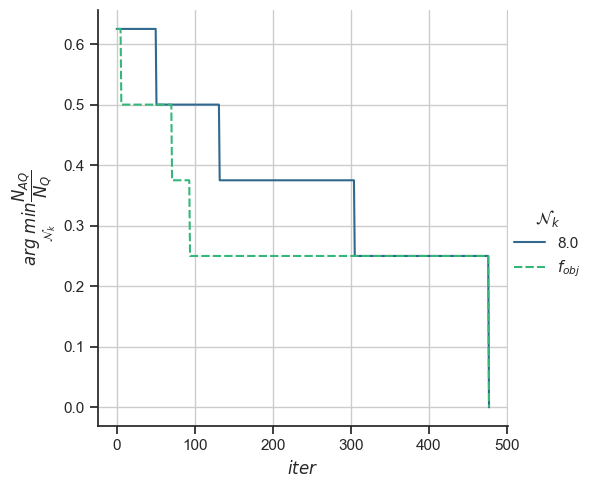

In [28]:
df_opt = df.loc[df[r'$\mathcal{N}_{k}$'] == opt_neighbor_pointer+1]
merged_df = pd.concat([df_opt, df_fobj], ignore_index=True)

sns.set_theme(style="ticks")

sns.relplot(data=merged_df,
            x=r'$iter$',
            y=r'$\underset{\mathcal{N}_{k}}{arg~min}\dfrac{N_{AQ}}{N_{Q}}$',
            hue   =r'$\mathcal{N}_{k}$',
            style =r'$\mathcal{N}_{k}$',
            kind="line",
            palette="viridis",
            markers=False,
            dashes=True,
            height=5, aspect=1)
plt.grid()
plt.show()

## Neighborhood Optimization
In this section, we analyze the behavior of the objective function for the neighborhood generated by the VNS algorithm, focusing on the impact of the diversification parameter k. To this end, we plot the changes in the objective function for different values of k in Figure 4.

One interesting observation is that the VNS algorithm frequently changes the diversification parameter k to escape from local optima traps and accelerate the minimization process. Figure 4 illustrates this behavior by showing all neighborhoods’ transitions in the objective function.

The fact that the k diversification parameter varies significantly across the iterative process indicates several local minima in the problem. These local minima can be challenging for optimization algorithms as they can lead to the algorithm converging to a suboptimal solution.

Overall, this analysis highlights the importance of exploring different diversification parameters in the neighborhood optimization process and the challenges posed by local optima traps. The findings can inform the development of more effective optimization algorithms for similar problems.

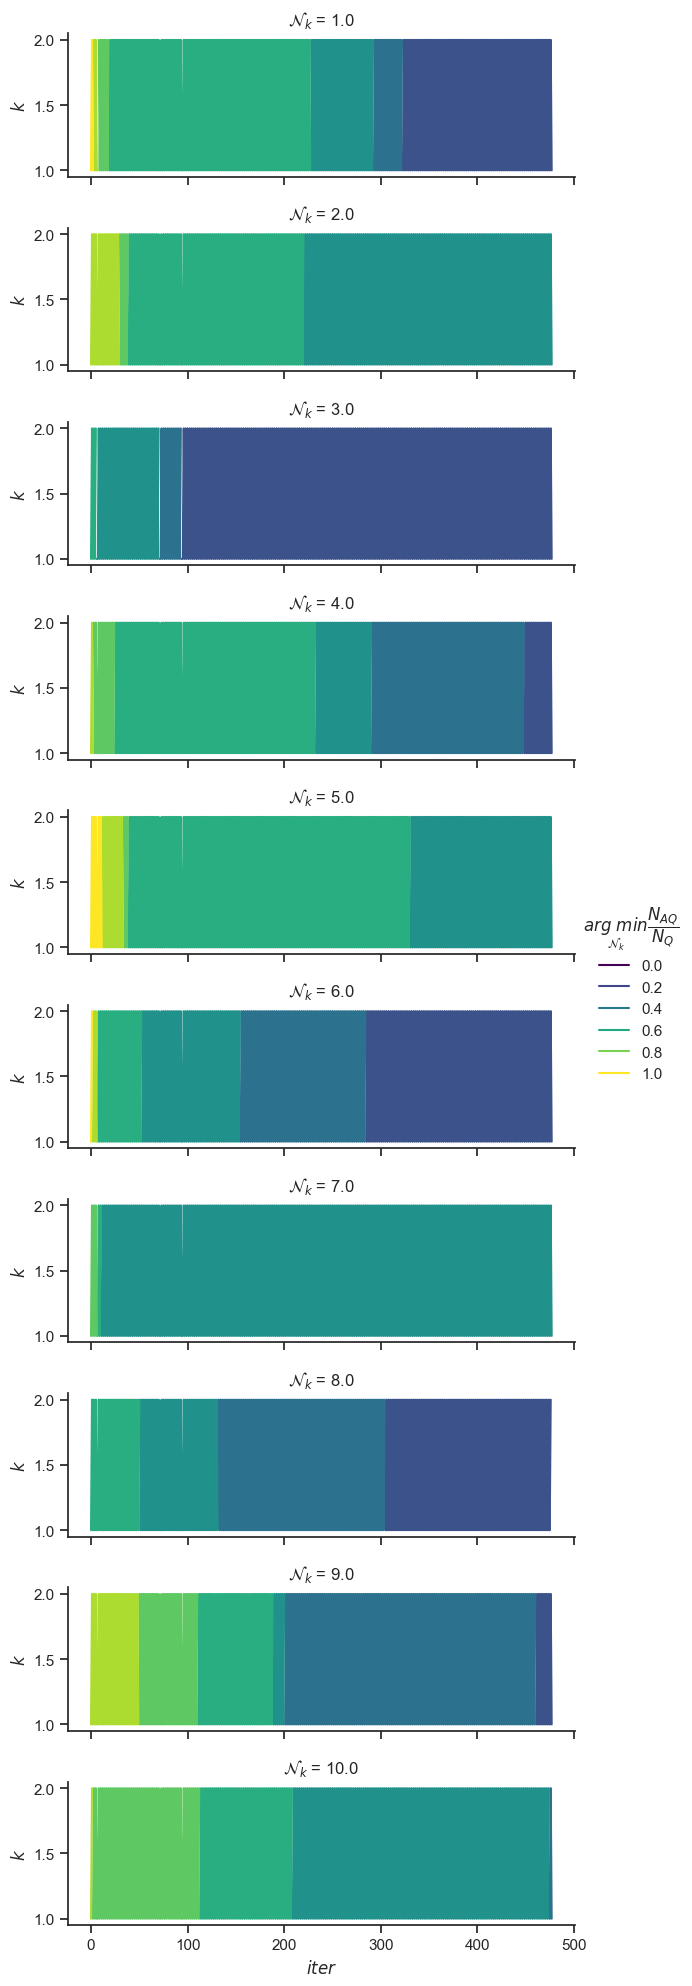

In [29]:
sns.set_theme(style="ticks")

sns.relplot(data=df,
            x=r'$iter$',
            y=r'$k$',
            hue=r'$\underset{\mathcal{N}_{k}}{arg~min}\dfrac{N_{AQ}}{N_{Q}}$',
            row   =r'$\mathcal{N}_{k}$',
            palette="viridis",
            kind="line",
            markers=True,
            dashes=False,
            height=2, aspect=3)
plt.show()

# Conclusions
This report provides a detailed analysis of applying VNS to the 8-Queen placement problem. The interactive visualization of the solution, the plot of the final board configuration, and the analysis of the objective function behavior offer valuable insights into the algorithm’s performance.